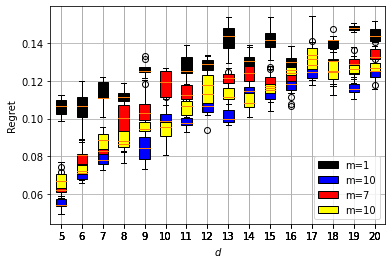

In [4]:
import pickle
f = open('regrets_tensor_b=100_d=20_r=3.p', 'rb')
d = pickle.load(f)
f.close()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1)

plt.grid()
plt.xlabel(r'$d$')
plt.ylabel('Regret')

m_list = range(1, 11, 3)
num_of_m = 4 # 2-4

bp_list = []

bp1 = ax.boxplot(d[0].T, positions=range(5,21,1), patch_artist=True)
bp2 = ax.boxplot(d[3].T, positions=range(5,21,1), patch_artist=True)

bp_list.append(bp1)
bp_list.append(bp2)
legend_list_labels = [f'm={m_list[0]}', f'm={m_list[-1]}']

for i in range(num_of_m-2):
    bp_list.append(ax.boxplot(d[i+1].T, positions=range(5,21,1), patch_artist=True))
    legend_list_labels.append(f'm={m_list[2+i]}')

colors = ['black', 'blue', 'red', 'yellow']
legend_list_bp = []

for j, bp in enumerate(bp_list):
    legend_list_bp.append(bp["boxes"][0])
    for b in bp['boxes']:
        b.set_facecolor(colors[j])

ax.legend(legend_list_bp,
          legend_list_labels,
          loc='lower right')

plt.savefig(f'log-loss_reg-vs-d_#m={num_of_m}.png')